# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
base_weather_url = "http://api.openweathermap.org/data/2.5/weather?q="
list_weather=[]
i=1
for city in cities:
    city_weather_url = base_weather_url + city + "&units=Imperial"+ "&appid="+ weather_api_key
    print(city_weather_url)
    try:
        response = requests.get(city_weather_url).json()
        latitude = response['coord']['lat']
        longitude = response['coord']['lon']
        temperature =response['main']['temp']
        maxtemperature =response['main']['temp_max']
        humidity = response['main']['humidity']
        wind_speed= response['wind']['speed']
        cloudiness= response['clouds']['all']
        country= response['sys']['country']
        date= response['dt']
        list_weather.append({"CityID":i,"City":city,"Country":country, "Date":date, "Latitude":latitude,"Longitude":longitude,"Temperature":temperature,"MaxTemperature":maxtemperature,  "Humidity":humidity,
                         "Wind Speed":wind_speed,
                         "Cloudiness":cloudiness})
        i=i+1        
    except requests.exceptions.RequestException as e:
        print(e)
    except:
        print("Correct values not found for" + city)
#len(list_weather)  


http://api.openweathermap.org/data/2.5/weather?q=busselton&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=portoferraio&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=barkly west&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=inhambane&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=hoquiam&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=Imperial&appid=328023610b951

http://api.openweathermap.org/data/2.5/weather?q=torbay&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=port moresby&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=grand river south east&units=Imperial&appid=328023610b9511778166565f69ee9654
Correct values not found forgrand river south east
http://api.openweathermap.org/data/2.5/weather?q=calama&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=mayo&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=umm kaddadah&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?q=andros town&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=lolua&units=Imperial&appid=328023610b9511778166565f69ee9654
Correct values not found forlolua
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=yushala&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=eston&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=ahipara&units=Imperial&appid

http://api.openweathermap.org/data/2.5/weather?q=yarada&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=krasnoselkup&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=olafsvik&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=ilulissat&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=talara&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=san carlos de bariloche&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=oussouye&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=college&units=Imperial&appid=328023

http://api.openweathermap.org/data/2.5/weather?q=ipixuna&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=samarai&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=kahului&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=antofagasta&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=libreville&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=bombay&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=alingsas&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=skjervoy&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=galiwinku&units=Imperial&appid=328023610b9511778166565f

Correct values not found fordolbeau
http://api.openweathermap.org/data/2.5/weather?q=vallenar&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=alice town&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=saint-leu&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=thunder bay&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=garowe&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=byron bay&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=santa rosa&u

http://api.openweathermap.org/data/2.5/weather?q=barroualie&units=Imperial&appid=328023610b9511778166565f69ee9654
Correct values not found forbarroualie
http://api.openweathermap.org/data/2.5/weather?q=katherine&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=kjollefjord&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=olenino&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=port lincoln&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=totkomlos&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=tarancon&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=leh&units

http://api.openweathermap.org/data/2.5/weather?q=lumeje&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=nakhon phanom&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=ukiah&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=sattahip&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=waterboro&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=lloydminster&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=aleksandrov gay&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=rincon&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq&units=Imperial&appid=328023610b9511

http://api.openweathermap.org/data/2.5/weather?q=camopi&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=huari&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=haines junction&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=peleduy&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=ensley&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=vestbygda&units=Imperial&appid=328023610b9511778166565f69ee9654
Correct values not found forvestbygda
http://api.openweathermap.org/data/2.5/weather?q=ardon&units=Imperial&appid=328023610b9511778166565f69ee9654
http://api.openweathermap.org/data/2.5/weather?q=koboldo&units=Imperial&appid=328023610b9511778166565f69ee9654
Correct values not found forkoboldo
http://api.openweathermap.org/data

In [48]:
# convert the list into a dataframe
df_city_data=pd.DataFrame(list_weather)
df_city_data = df_city_data.set_index('CityID')
df_city_data


# bamboolib live code export
df_city_data = df_city_data.reset_index()
df_city_data

,City,Country,Date,Latitude,Longitude,Temperature,MaxTemperature,Humidity,Wind Speed,Cloudiness
CityID,,,,,,,,,,
1,busselton,AU,1586609564,-33.65,115.33,73.00,73.00,43,5.01,99
2,rikitea,PF,1586609787,-23.12,-134.97,76.86,76.86,77,6.76,95
3,portoferraio,IT,1586609787,42.81,10.31,68.97,75.20,45,11.41,5
4,barkly west,ZA,1586609787,-28.54,24.52,82.40,82.40,58,13.87,20
5,provideniya,RU,1586609787,64.38,-173.30,22.28,22.28,96,5.84,100
...,...,...,...,...,...,...,...,...,...,...
564,antalaha,MG,1586609834,-14.90,50.28,83.25,83.25,68,13.42,17
565,villa carlos paz,AR,1586609834,-31.42,-64.50,63.30,64.99,63,18.34,0
566,mau,IN,1586609835,25.95,83.55,98.92,98.92,11,8.34,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
#exporting it into a csv file
df_city_data.to_csv("../output_data/"+output_data_file)


In [64]:
# Get a unix timestamp from the dataframe (max value) and convert it into a date
td_unix_date = df_city_data['Date'].max()
today_date = datetime.datetime.fromtimestamp(
        int(td_unix_date)
    ).strftime('%Y-%m-%d')


'2020-04-11'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

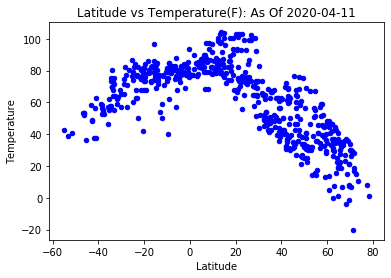

<Figure size 432x288 with 0 Axes>

In [65]:
df_city_data.plot(kind='scatter',x='Latitude',y='Temperature',color='blue')
today = pd.Timestamp('today')
plt.title(f"Latitude vs Temperature(F): As Of {today_date}")
plt.show()
plt.savefig("../output_data/"+"latvstemp.png")


# Observation on Latitude vs. Temperature Plot
Looking at the above plot it can be inferred that tempreature is generally higher towards equator(0 degrees) and shows a lower trend as we move towards the pole (+-40 degrees and lower) . For latitudes between (-40 and 40 ) there is not much variation is tempreature.

#### Latitude vs. Humidity Plot

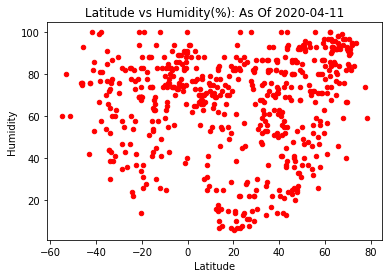

<Figure size 432x288 with 0 Axes>

In [66]:
df_city_data.plot(kind='scatter',x='Latitude',y='Humidity',color='red')
plt.title(f"Latitude vs Humidity(%): As Of {today_date}")
plt.show()
plt.savefig("../output_data/"+"latvshumd.png")


# Observation on Latitude vs. Humidity Plot
Looking at the above plot which was created using the sample data on 11th April 2020, the following can be observed:
1. It seems like the humidity is relatively high around the equatorial belt (0+-20 degree latitude)
2. I observe high levels of humidity in cities which are in Northern Hemisphere furthur away from pole. It could be because of a local weather phenomenon.

#### Latitude vs. Cloudiness Plot

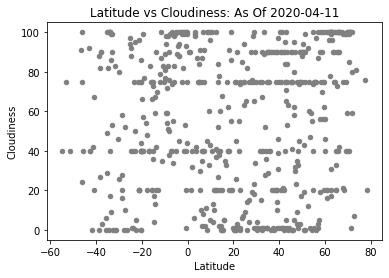

<Figure size 432x288 with 0 Axes>

In [73]:
df_city_data.plot(kind='scatter',x='Latitude',y='Cloudiness',color='grey')
plt.title(f"Latitude vs Cloudiness: As Of {today_date}")
plt.show()
plt.savefig("../output_data/"+"latvscloudiness.png")

# Observation on Latitude vs. Cloudiness
Looking at the above plot which was created using the sample data on 11th April 2020, no inference could be drawn.


#### Latitude vs. Wind Speed Plot

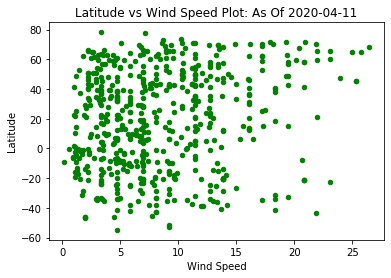

<Figure size 432x288 with 0 Axes>

In [74]:
df_city_data.plot(kind='scatter',x='Wind Speed',y='Latitude',color='green')
plt.title(f"Latitude vs Wind Speed Plot: As Of {today_date}")
plt.show()
plt.savefig("../output_data/"+"latvswindspeed.png")

# Observation on Latitude vs. WindSpeed
Looking at the above plot which was created using the sample data on 11th April 2020:
The genereal wind speed is between the range of 0mph-20mph, irrestpective of the latitude. Even though higher latitude regions may experience some instances where the winds may gust above 20mph.


## Linear Regression

In [27]:
# OPTIONAL: Create a function to create Linear Regression plots
def getRegression(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope,intercept;

In [82]:
# Create Northern and Southern Hemisphere DataFrames
# Dataframe for Norther Hemisphere
df_city_data_southern = df_city_data.loc[df_city_data['Latitude'] < 0]
df_city_data_northern = df_city_data.loc[df_city_data['Latitude'] >= 0]


,City,Country,Date,Latitude,Longitude,Temperature,MaxTemperature,Humidity,Wind Speed,Cloudiness
CityID,,,,,,,,,,
1,busselton,AU,1586609564,-33.65,115.33,73.00,73.00,43,5.01,99
2,rikitea,PF,1586609787,-23.12,-134.97,76.86,76.86,77,6.76,95
4,barkly west,ZA,1586609787,-28.54,24.52,82.40,82.40,58,13.87,20
6,inhambane,MZ,1586609681,-23.86,35.38,84.20,84.20,54,4.70,40
10,airai,TL,1586609788,-8.93,125.41,62.38,62.38,74,1.21,72
...,...,...,...,...,...,...,...,...,...,...
548,bundaberg,AU,1586609833,-24.85,152.35,74.25,75.00,83,5.82,88
553,alagoinha,BR,1586609834,-6.95,-35.55,81.32,86.00,74,11.41,40
555,japura,ID,1586609834,-0.32,102.35,75.78,75.78,90,0.58,99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

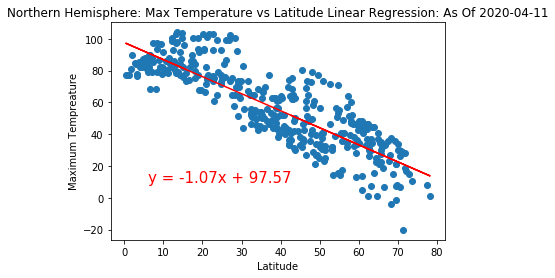

In [96]:
#call linear regression function first
y = df_city_data_northern['MaxTemperature']
x = df_city_data_northern['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
today = pd.Timestamp('today')
plt.title(f"Northern Hemisphere: Max Temperature vs Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Tempreature")
plt.savefig("../output_data/"+"north_MaxTemp_Lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

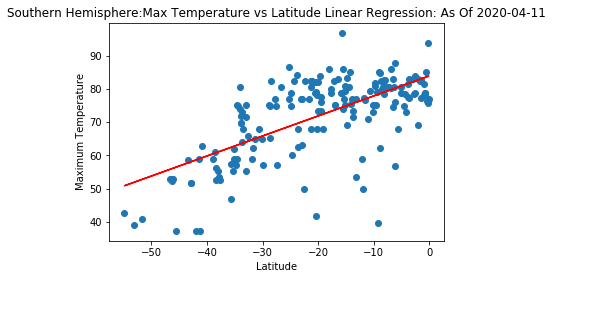

In [97]:
#call linear regression function first
x1 = df_city_data_southern['Latitude']
y1 = df_city_data_southern['MaxTemperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x1,y1)
plt.plot(x1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
today = pd.Timestamp('today')
plt.title(f"Southern Hemisphere:Max Temperature vs Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.savefig("../output_data/"+"south_MaxTemp_Lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

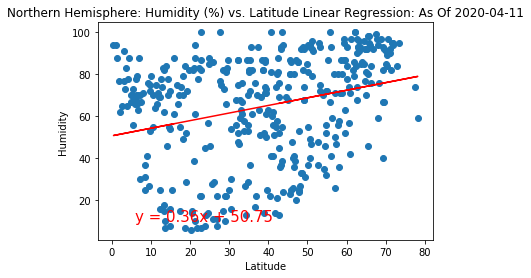

In [88]:
y = df_city_data_northern['Humidity']
x = df_city_data_northern['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/"+"north_humidity_Lat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

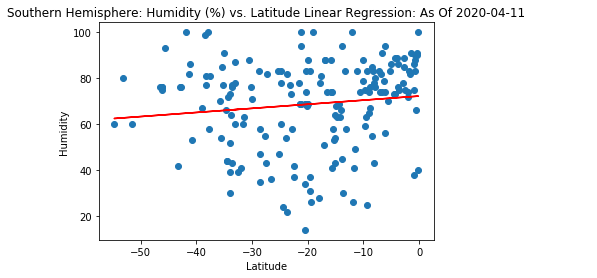

In [91]:
y = df_city_data_southern['Humidity']
x = df_city_data_southern['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/"+"south_humidity_Lat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

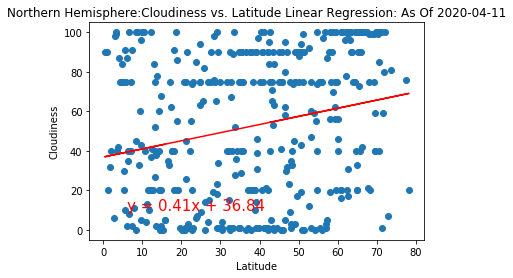

In [92]:
y = df_city_data_northern['Cloudiness']
x = df_city_data_northern['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Northern Hemisphere:Cloudiness vs. Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/"+"north_cloud_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

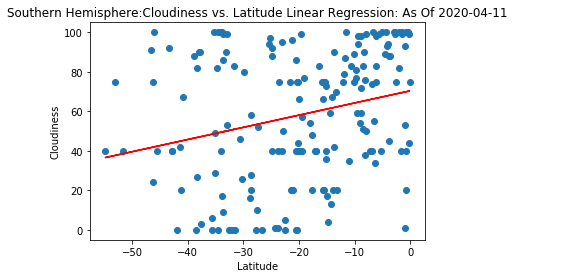

In [93]:
y = df_city_data_southern['Cloudiness']
x = df_city_data_southern['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere:Cloudiness vs. Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/"+"south_cloud_Lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

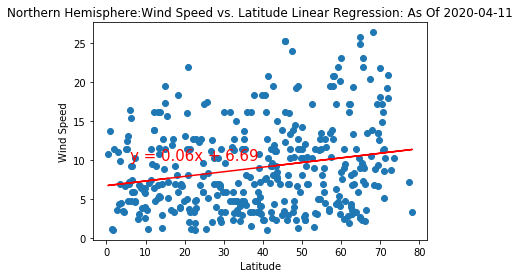

In [94]:
y = df_city_data_northern['Wind Speed']
x = df_city_data_northern['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Northern Hemisphere:Wind Speed vs. Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/"+"north_wind_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

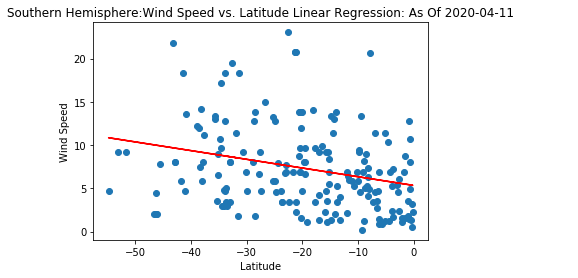

In [95]:
y = df_city_data_southern['Wind Speed']
x = df_city_data_southern['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f"Southern Hemisphere:Wind Speed vs. Latitude Linear Regression: As Of {today_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/"+"south_wind_Lat.png")

# Observations:Northern Hemisphere
#### As the latitude increases:
There is a negative correlation between maximum temperature and latitude. That is, as the latitude increases, max-temperature decreases and vice-versa.
No definitive relationship can be inferred between the latitude and the level of humidity.


# Observations:Southern Hemisphere
#### As the latitude increases:
There is a positive correlation between maximum temperature and latitude. That is, as the latitude decreases (in sense of moving from poles towards equator), max-temperature moves from low to high.
No definitive relationship can be inferred between the latitude and the level of humidity.